<h1>Изменение шрифта в мобильном приложении</h1>

Изучить воронку продаж. Провести А/А/Б-тест (246, 247, 248 группы соответственно). Эксперимент - пользователям поменяли шрифт в мобильном приложении. 

### Открытие и изучение данных

In [33]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
from plotly import graph_objects as go

In [34]:
data = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
data

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [36]:
data.duplicated().sum()

413

In [37]:
data.isna().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

In [38]:
data['ExpId'].value_counts()

248    85747
246    80304
247    78075
Name: ExpId, dtype: int64

In [39]:
data['EventName'].value_counts()

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: EventName, dtype: int64

1. Необходимо поменять названия столбцов 
2. Типы данных менять не надо, столбец с датой тоже менять не буду, создам новый столбец с более удобным форматом для понимания
3. Удалить дубликаты

### Подготовка данных

In [40]:
# удаление дубликатов
data.drop_duplicates(inplace=True)

In [41]:
# переименование столбцов
data.columns = ['event_name', 'device_id', 'event_timestamp', 'exp_id']
data

,event_name,device_id,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [42]:
# добавление столбцов с датой в понятном формате
data['datetime'] = pd.to_datetime(data['event_timestamp'], unit = 's')
data['date'] = pd.to_datetime(data['datetime']).dt.date
data

,event_name,device_id,event_timestamp,exp_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


Данные готовы

### Изучение и проверка данных

In [43]:
# всего событий
data.shape[0]

243713

In [44]:
# всего пользователей
len(data['device_id'].unique())

7551

In [45]:
# среднее количество событий на пользователя
data.shape[0] / len(data['device_id'].unique())

32.27559263673685

In [46]:
# период событий
max = data['datetime'].max()
min = data['datetime'].min()
print(min, max)

2019-07-25 04:43:36 2019-08-07 21:15:17


Text(0, 0.5, 'Количество событий')

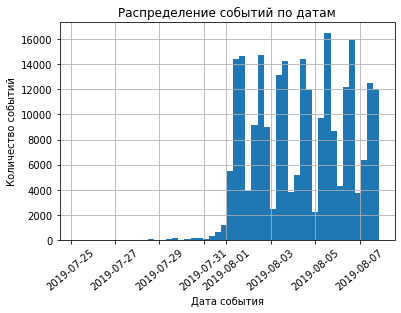

In [47]:
data['datetime'].hist(bins=50)
plt.xticks(rotation=40)
plt.title('Распределение событий по датам')
plt.xlabel('Дата события')
plt.ylabel('Количество событий')

Хотя данные предоставленны с 25.07.2019, событий до 01.08.2019 практически не было, поэтому стоит исключить из анализа события ранее 01.08.2019

In [48]:
# выясняю, сколько событий надо убрать
data[data['date'] < pd.to_datetime('2019-08-01')]

,event_name,device_id,event_timestamp,exp_id,datetime,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25
...,...,...,...,...,...,...
2823,OffersScreenAppear,2413191300976302222,1564617295,247,2019-07-31 23:54:55,2019-07-31
2824,MainScreenAppear,5505110279185484837,1564617450,247,2019-07-31 23:57:30,2019-07-31
2825,MainScreenAppear,5505110279185484837,1564617462,247,2019-07-31 23:57:42,2019-07-31
2826,MainScreenAppear,5505110279185484837,1564617472,247,2019-07-31 23:57:52,2019-07-31


событий ранее 01.08.2019: 2826 - это примерно 1,2% от всех событий

In [49]:
# убираю ненужные данные
data = data.query('date >= @pd.to_datetime("2019-08-01")')
data

,event_name,device_id,event_timestamp,exp_id,datetime,date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [50]:
data['exp_id'].value_counts()

248    84563
246    79302
247    77022
Name: exp_id, dtype: int64

Пользователи из всех 3х экспериментальных групп остались, перекоса сильного не появилось.

### Воронка событий

In [51]:
# количество событий по шагам
data['event_name'].value_counts()

MainScreenAppear           117328
OffersScreenAppear          46333
CartScreenAppear            42303
PaymentScreenSuccessful     33918
Tutorial                     1005
Name: event_name, dtype: int64

In [52]:
# % уникальных пользователей
data_event = data.groupby('event_name').agg(count_device=('device_id','nunique'), all_device=('device_id','count')).sort_values('count_device', ascending=False).reset_index()
data_event['%_device'] = round(data_event['count_device'] / len(data['device_id'].unique()) * 100)
data_event

,event_name,count_device,all_device,%_device
0,MainScreenAppear,7419,117328,98.0
1,OffersScreenAppear,4593,46333,61.0
2,CartScreenAppear,3734,42303,50.0
3,PaymentScreenSuccessful,3539,33918,47.0
4,Tutorial,840,1005,11.0


Порядок событий:
1. MainScreenAppear
2. OffersScreenAppear
3. CartScreenAppear
4. PaymentScreenSuccessful
5. событие Tutorial не входит в цепочку последовательных действий, скорее это по желанию пользователя, поэтому исключим это событие из воронки

In [53]:
# воронка событий 
# %_funnel - % пользователей, перешедших на следующий шаг
# %_funnel_to_the_first - процент пользователей с первого события, которые перешли на этот шаг
data_event = data_event.query('event_name != "Tutorial"').copy()
data_event.loc[0, '%_funnel'] = 100
data_event.loc[0, '%_funnel_to_the_first'] = 100
for i in range(1, 4):
    data_event.loc[i, '%_funnel'] = int(data_event.loc[i, 'count_device'] / data_event.loc[i-1, 'count_device'] * 100)
    data_event.loc[i, '%_funnel_to_the_first'] = int(data_event.loc[i, 'count_device'] / data_event.loc[0, 'count_device'] * 100)
    
data_event

,event_name,count_device,all_device,%_device,%_funnel,%_funnel_to_the_first
0,MainScreenAppear,7419,117328,98.0,100.0,100.0
1,OffersScreenAppear,4593,46333,61.0,61.0,61.0
2,CartScreenAppear,3734,42303,50.0,81.0,50.0
3,PaymentScreenSuccessful,3539,33918,47.0,94.0,47.0


In [54]:
# график воронка продаж
fig = go.Figure(go.Funnel(
    x=data_event['count_device'], 
    y=data_event['event_name'],
    marker={'color':'teal'}, 
    textinfo = "value+percent initial"))
fig.show()

Самая большая потеря пользователей при переходе с 1го шага MainScreenAppear на 2й шаг OffersScreenAppear.
Возможные причины: нет необходимого товара, сложный поиск товара, сайт слишком долго грузится.

До шага с оплатой доходит только 47% пользователей.

### Результаты эксперимента

#### Подготовка данных к эксперименту

In [55]:
# количество уникальных пользователей в экспериментальных группах
data.groupby('exp_id').agg(count_device=('device_id','nunique'))

,count_device
exp_id,
246,2484
247,2513
248,2537


In [56]:
# функция для сравнения долей
def comparison(event, group_1, group_2, group_3=None):
    
    df_1 = data.query('exp_id == @group_1')
    
    if group_3 == None:    
        df_2 = data.query('exp_id == @group_2')
    else:
        df_2 = data.query('exp_id == @group_2 or exp_id == @group_3')
        
    all_1 = len(df_1['device_id'].unique())
    all_2 = len(df_2['device_id'].unique())
    
    alpha = 0.01
    exp_group_1 = len(df_1.query('event_name == @event')['device_id'].unique())
    exp_group_2 = len(df_2.query('event_name == @event')['device_id'].unique())
    p_1 =  exp_group_1 / all_1
    p_2 = exp_group_2 / all_2
    p_combined = (exp_group_1 + exp_group_2) / (all_1 + all_2)
    difference = p_1 - p_2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_1 + 1/all_2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    if p_value < alpha:
        result = 'p-значение: ', p_value,'Отвергаем нулевую гипотезу: между долями есть значимая разница'
    else:
        result = 'p-значение: ', p_value, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными' 

    return result

In [57]:
events = data_event['event_name'].to_list()

#### А/А-тест (246 и 247 группы)

Провожу А/А-тест. Нулевая гипотеза: Статистически значимых различий между группами А(246) и А(247) нет.
Альтернативная гипотеза: Статистически значимые различия между группами А(246) и А(247) есть

In [58]:
for event in events:
    print(event, ':', comparison(event, 246, 247))
    print(" ")

MainScreenAppear : ('p-значение: ', 0.7570597232046099, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 
OffersScreenAppear : ('p-значение: ', 0.2480954578522181, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 
CartScreenAppear : ('p-значение: ', 0.22883372237997213, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 
PaymentScreenSuccessful : ('p-значение: ', 0.11456679313141849, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 


Вывод:
Т.к. не получилось отвергнуть нулевую гипотезу ни с одной из групп, считаю, что статистически значимых различий между группами 246 и 247 нет. Значит можно проводить А/Б-тест.

#### А/Б-тест (246 и 248 группы)

Провожу А/Б-тест. Нулевая гипотеза: Статистически значимых различий между группами А(246) и Б(248) нет.
Альтернативная гипотеза: Статистически значимые различия между группами А(246) и А(248) есть.

In [59]:
for event in events:
    print(event, ':',  comparison(event, 246, 248))
    print(" ")

MainScreenAppear : ('p-значение: ', 0.2949721933554552, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 
OffersScreenAppear : ('p-значение: ', 0.20836205402738917, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 
CartScreenAppear : ('p-значение: ', 0.07842923237520116, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 
PaymentScreenSuccessful : ('p-значение: ', 0.2122553275697796, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 


Вывод:
Т.к. не получилось отвергнуть нулевую гипотезу ни с одной из групп, считаю, что статистически значимых различий между группами 246 и 248 нет.

#### А/Б-тест (247 и 248 группы)

Провожу А/Б-тест. Нулевая гипотеза: Статистически значимых различий между группами А(247) и Б(248) нет.
Альтернативная гипотеза: Статистически значимые различия между группами А(247) и А(248) есть.

In [60]:
for event in events:
    print(event, ':',  comparison(event, 247, 248))
    print(" ")

MainScreenAppear : ('p-значение: ', 0.4587053616621515, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 
OffersScreenAppear : ('p-значение: ', 0.9197817830592261, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 
CartScreenAppear : ('p-значение: ', 0.5786197879539783, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 
PaymentScreenSuccessful : ('p-значение: ', 0.7373415053803964, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 


Вывод:
Т.к. не получилось отвергнуть нулевую гипотезу ни с одной из групп, считаю, что статистически значимых различий между группами 247 и 248 нет.

#### А/Б-тест (объединенная группа 246 + 247  и 248 группа)

Провожу А/Б-тест. Нулевая гипотеза: Статистически значимых различий между группами А(246+247) и Б(248) нет.
Альтернативная гипотеза: Статистически значимые различия между группами А(246+247) и А(248) есть.

In [61]:
for event in events:
    print(event, ':',  comparison(event, 248, 247, 246))
    print(" ")

MainScreenAppear : ('p-значение: ', 0.29424526837179577, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 
OffersScreenAppear : ('p-значение: ', 0.43425549655188256, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 
CartScreenAppear : ('p-значение: ', 0.18175875284404386, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 
PaymentScreenSuccessful : ('p-значение: ', 0.6004294282308704, 'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
 


Вывод:
Т.к. не получилось отвергнуть нулевую гипотезу ни с одной из групп, считаю, что статистически значимых различий между объединенной группой 246 + 247 и группой 248 нет.

#### Вывод

При проверке гипотез ни разу не удалось отвергнуть нулевую гипотезу, следовательно, новый шрифт никак не влияет на поведение пользователей.

### Вывод

1. Самая большая потеря пользователей при переходе с 1го шага MainScreenAppear на 2й шаг OffersScreenAppear. Возможные причины: нет необходимого товара, сложный поиск товара, сайт слишком долго грузится.
2. До шага с оплатой доходит только 47% пользователей.
3. Новый шрифт никак не влияет на поведение пользователей.